En este notebook está la implementación del modelo de series temporales **Holt-Winters**, para analizar tendencias estacionales. Este se usará para determinar la posible cantidad de colocaciones de créditos a futuro y los índices agrícolas. También puede referirse a él desde Google Colab, [aquí](https://colab.research.google.com/drive/1_MOSZDpkNYrLeLXLL_Kws-W0zMobQ4Zk?usp=sharing)

# 1. Serie de tiempo para las Colocaciones de Crédito del Sector Agropecuario

In [1]:
#se importan las librerías necesarias para el desarrollo
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
df_creditos = pd.read_csv('Colocaciones_de_Credito_Sector_Agropecuario.csv')

In [3]:
df_creditos

,Año,Mes,fuente Colocacion,Id Tipo Prod,Tipo Productor,Valor Inversion,Colocacion,ID Depto,Departamento Inversion,Id Munic,...,Linea de Credito,Linea de Produccion,ID Rubro,Destino de Credito,Genero,% FAG,Vlr Inic Garantia,LATITUD,LONGITUD,CANTIDAD
0,2021,4,REDESCUENTO,1,MEDIANO,24000000.0,23655000.0,5,ANTIOQUIA,5237,...,Inversión,COMPRA DE ANIMALES (I),253061,253061 Retención de vientres ganado bovino,H,NaN,NaN,6.500000,-75.333333,1
1,2021,4,REDESCUENTO,0,PEQUEÑO,6000000.0,5000000.0,68,SANTANDER,68169,...,Inversión,SIEMBRAS (I),151310,151310 Aguacate,H,80.0,4000000.0,7.300000,-72.966667,1
2,2021,4,REDESCUENTO,0,PEQUEÑO,8200000.0,8200000.0,41,HUILA,41807,...,Inversión,INFRAEST Y ADECU DE TIERRAS (I),347050,347050 Construcción beneficiaderos de café,H,80.0,6560000.0,2.000000,-75.916667,1
3,2021,4,REDESCUENTO,0,PEQUEÑO,15000000.0,15000000.0,85,CASANARE,85139,...,Inversión,SIEMBRAS (I),151050,151050 Cacao,H,80.0,12000000.0,4.833333,-72.333333,1
4,2021,4,REDESCUENTO,0,PEQUEÑO,10000000.0,10000000.0,85,CASANARE,85300,...,Inversión,SIEMBRAS (I),141060,141060 Caña panelera,M,80.0,8000000.0,4.853611,-73.043056,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1814261,2024,8,REDESCUENTO,3,PEQUEÑO PPIB,30000000.0,30000000.0,68,SANTANDER,68549,...,Capital de Trabajo,PRODUCCIÓN (CT),134010,134010 Pimentón,H,80.0,24000000.0,6.583333,-73.166667,1
1814262,2024,8,REDESCUENTO,3,PEQUEÑO PPIB,10000000.0,10000000.0,76,VALLE DEL CAUCA,76622,...,Capital de Trabajo,PRODUCCIÓN (CT),134010,134010 Pimentón,H,80.0,8000000.0,4.414722,-76.154722,1
1814263,2024,8,REDESCUENTO,3,PEQUEÑO PPIB,15000000.0,15000000.0,68,SANTANDER,68432,...,Capital de Trabajo,PRODUCCIÓN (CT),134010,134010 Pimentón,H,80.0,12000000.0,6.783333,-72.666667,1
1814264,2024,8,REDESCUENTO,3,PEQUEÑO PPIB,25000000.0,25000000.0,25,CUNDINAMARCA,25151,...,Capital de Trabajo,PRODUCCIÓN (CT),134010,134010 Pimentón,H,80.0,20000000.0,4.450000,-73.950000,1


Dado que hay una columna para año y otra para mes, se crea una sola columna con ambos datos, se organiza el conjunto de datos en orden cronológico si hace falta y finalmente se toma como índice a la columna `Fecha`

In [4]:
# Crear una columna de fecha a partir de "Año" y "Mes"
df_creditos['Fecha'] = pd.to_datetime(df_creditos['Año'].astype(str) + '-' + df_creditos['Mes'].astype(str) + '-01')
df_creditos = df_creditos.set_index('Fecha')  # Usamos la nueva columna como índice
df_creditos = df_creditos.sort_index()
df_creditos.head(6)

,Año,Mes,fuente Colocacion,Id Tipo Prod,Tipo Productor,Valor Inversion,Colocacion,ID Depto,Departamento Inversion,Id Munic,...,Linea de Credito,Linea de Produccion,ID Rubro,Destino de Credito,Genero,% FAG,Vlr Inic Garantia,LATITUD,LONGITUD,CANTIDAD
Fecha,,,,,,,,,,,,,,,,,,,,,
2021-01-01,2021,1,REDESCUENTO,0,PEQUEÑO,8500000.0,7844806.0,52,NARIÑO,52317,...,Normalización de Cartera,PRODUCCIÓN (CT),111500,111500 PAPA - SIEMBRA,H,80.0,6275844.0,1.000000,-77.750000,1
2021-01-01,2021,1,REDESCUENTO,0,PEQUEÑO,4000000.0,4000000.0,5,ANTIOQUIA,5148,...,Capital de Trabajo,COMERCIALIZACION (CT),307015,307015 Costos operativos y de funcionamiento p...,H,80.0,3200000.0,6.085000,-75.338611,1
2021-01-01,2021,1,REDESCUENTO,0,PEQUEÑO,10000000.0,10000000.0,54,NORTE DE SANTANDER,54125,...,Capital de Trabajo,PRODUCCIÓN (CT),111500,111500 Papa,H,80.0,8000000.0,7.250000,-72.583333,1
2021-01-01,2021,1,REDESCUENTO,0,PEQUEÑO,4000000.0,4000000.0,27,CHOCÓ,27099,...,Capital de Trabajo,SOSTENIMIENTO (CT),133010,133010 Plátano - Sostenimiento,M,80.0,3200000.0,6.523611,-76.974444,1
2021-01-01,2021,1,REDESCUENTO,0,PEQUEÑO,3000000.0,3000000.0,73,TOLIMA,73563,...,Capital de Trabajo,SOSTENIMIENTO (CT),132050,132050 Sostenimiento de cacao,H,80.0,2400000.0,3.750000,-74.833333,1
2021-01-01,2021,1,REDESCUENTO,0,PEQUEÑO,9000000.0,9000000.0,15,BOYACÁ,15861,...,Capital de Trabajo,PRODUCCIÓN (CT),111500,111500 Papa,H,80.0,7200000.0,5.416667,-73.500000,1


In [5]:
# Agrupar por mes y año si es necesario
df_creditos_mensual = df_creditos.resample('M').sum()  # 'M' indica frecuencia mensual

<ipython-input-5-aa0f67a59bb0>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_creditos_mensual = df_creditos.resample('M').sum()  # 'M' indica frecuencia mensual


Observamos cómo resulta la serie de tiempo

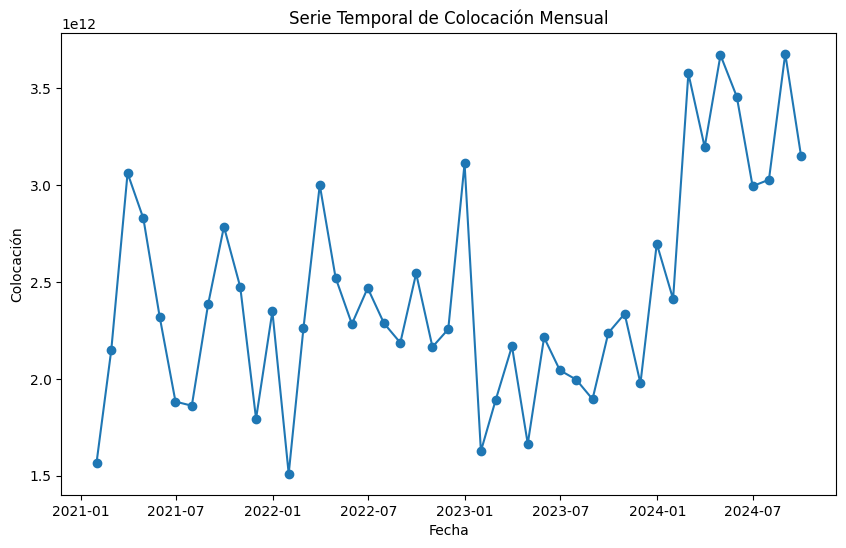

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(df_creditos_mensual['Colocacion'], marker='o')
plt.title('Serie Temporal de Colocación Mensual')
plt.xlabel('Fecha')
plt.ylabel('Colocación')
plt.show()

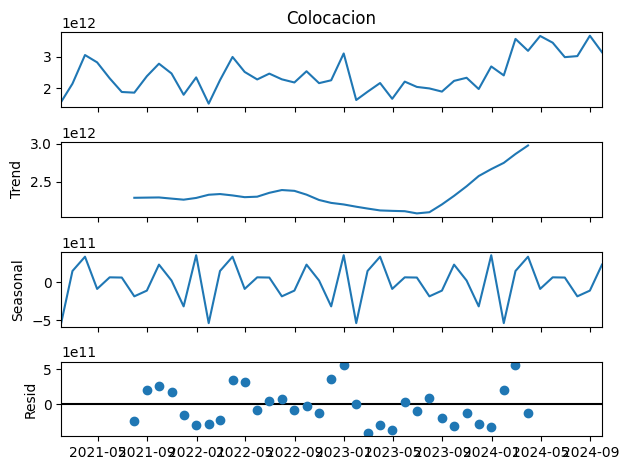

In [7]:
# Descomposición aditiva
decomposition = seasonal_decompose(df_creditos_mensual['Colocacion'], model='additive')
decomposition.plot()
plt.show()

In [8]:
# Ajustar el modelo Holt-Winters a la serie temporal
modelo_hw = ExponentialSmoothing(df_creditos_mensual['Colocacion'],
                                 trend='add',  # Para capturar tendencia
                                 seasonal='add',  # Para capturar estacionalidad
                                 seasonal_periods=12  # Periodo estacional de 12 para datos mensuales
                                ).fit()

# Proyectar para los próximos 12 meses
proyeccion_hw = modelo_hw.forecast(steps=12)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


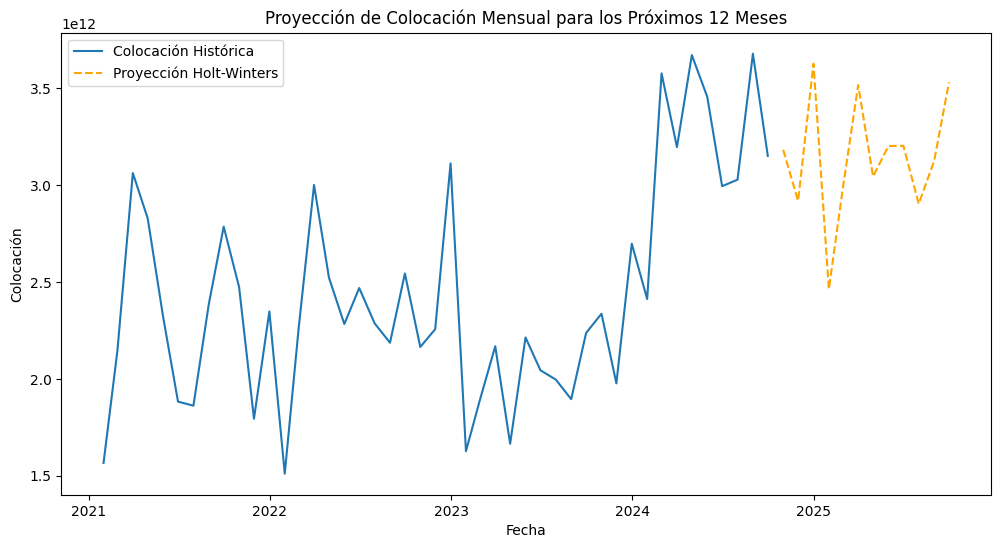

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(df_creditos_mensual['Colocacion'], label='Colocación Histórica')
plt.plot(proyeccion_hw, label='Proyección Holt-Winters', color='orange', linestyle='--')
plt.title('Proyección de Colocación Mensual para los Próximos 12 Meses')
plt.xlabel('Fecha')
plt.ylabel('Colocación')
plt.legend()
plt.show()

Es posible observar que el modelo toma la caída de las colocaciones al inicio del año, las cuales siempre están seguidas por una considerable subida, para luego estabilizarse un poco durante la mitad del año y al final volver a tener una subida considerable.

# 2 Serie de tiempo para indices de precios de insumos agrícolas

In [11]:
df_insumos = pd.read_csv('_ndice_de_precios_de_insumos_agr_colas_20241104.csv')

In [12]:
df_insumos

,Fecha,Indice_total,Total_Fertilizantes,Total_Plaguicidas,Total_Otros,Total_Simples,Total_Compuestos,Total_Herbicidas,Total_Fungicidas,Total_Insecticidas,...,Metomil,Tiametoxam + lambdacihalotrina,Abamectina,Imidacloprid,Profenofos + cipermetrina,Cipermetrina,Profenofos,Total_Coadyuvantes,Total_Reguladores,Total_Molusquicidas
0,12/2018,90.67,90.36,91.24,NaN,91.57,89.41,93.56,90.30,87.04,...,82.84,93.01,90.97,92.52,80.13,85.94,83.91,0.00,0.00,0.00
1,01/2019,92.72,93.49,91.31,NaN,95.64,91.81,93.51,90.47,87.30,...,83.39,92.81,92.02,91.80,80.17,85.39,83.87,0.00,0.00,0.00
2,02/2019,94.06,95.59,91.29,NaN,98.04,93.68,93.34,90.64,87.43,...,82.97,92.90,92.77,92.15,80.44,87.05,83.71,0.00,0.00,0.00
3,03/2019,95.22,97.22,91.58,NaN,99.49,95.45,93.51,91.24,87.72,...,83.33,93.44,92.33,92.21,80.20,87.75,83.82,0.00,0.00,0.00
4,04/2019,95.34,97.27,91.85,NaN,99.19,95.77,93.62,91.63,88.23,...,84.57,93.58,92.27,92.93,81.78,89.43,84.19,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,05/2024,134.75,139.13,128.29,125.65,134.21,142.88,136.43,117.67,118.73,...,122.57,89.67,100.52,98.92,124.40,124.20,145.56,125.52,123.70,196.04
66,06/2024,134.78,139.81,127.31,125.65,133.37,144.81,134.23,117.58,119.34,...,122.09,88.82,99.76,95.63,123.83,125.22,144.68,125.55,123.55,197.23
67,07/2024,135.82,142.58,125.69,126.03,134.94,148.55,130.56,116.90,120.97,...,122.39,87.70,99.84,95.09,123.93,123.78,141.29,126.07,123.50,196.49
68,08/2024,135.92,143.58,124.39,125.28,134.98,150.34,128.84,116.10,120.03,...,121.36,85.66,99.05,95.81,124.14,122.60,139.52,125.14,123.35,196.15


In [15]:
df_insumos['Fecha'] = pd.to_datetime(df_insumos['Fecha'], format='%m/%Y')
# Agrupar los datos por 'Fecha' para obtener el total de colocación mensual
df_total_mensual = df_insumos.groupby('Fecha')['Indice_total'].mean().reset_index()
df_fertilizantes_mensual = df_insumos.groupby('Fecha')['Total_Fertilizantes'].mean().reset_index()
df_plaguicidas_mensual = df_insumos.groupby('Fecha')['Total_Plaguicidas'].mean().reset_index()
df_herbicidas_mensual = df_insumos.groupby('Fecha')['Total_Herbicidas'].mean().reset_index()
df_fungicidas_mensual = df_insumos.groupby('Fecha')['Total_Fungicidas'].mean().reset_index()
df_insecticidas_mensual = df_insumos.groupby('Fecha')['Total_Insecticidas'].mean().reset_index()

# Establecer 'Fecha' como índice
df_total_mensual = df_total_mensual.set_index('Fecha')
df_fertilizantes_mensual = df_fertilizantes_mensual.set_index('Fecha')
df_plaguicidas_mensual = df_plaguicidas_mensual.set_index('Fecha')
df_herbicidas_mensual = df_herbicidas_mensual.set_index('Fecha')
df_fungicidas_mensual = df_fungicidas_mensual.set_index('Fecha')
df_insecticidas_mensual = df_insecticidas_mensual.set_index('Fecha')

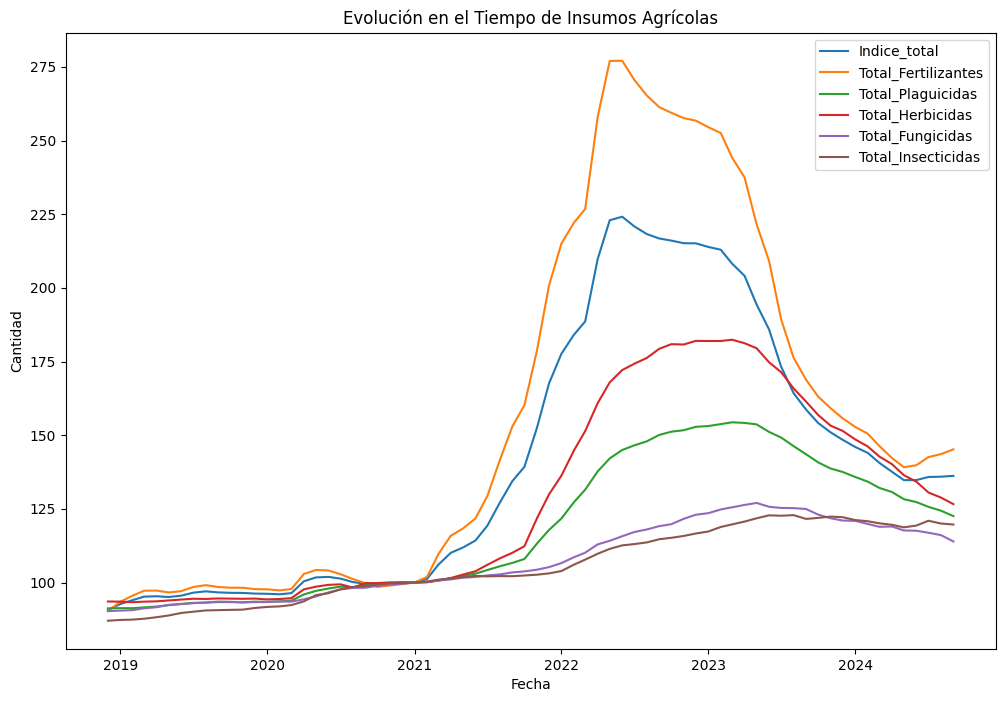

In [20]:
# Diccionario que asocia los DataFrames con las columnas que quieres graficar
insumos = {
    'df_total_mensual': 'Indice_total',
    'df_fertilizantes_mensual': 'Total_Fertilizantes',
    'df_plaguicidas_mensual': 'Total_Plaguicidas',
    'df_herbicidas_mensual': 'Total_Herbicidas',
    'df_fungicidas_mensual': 'Total_Fungicidas',
    'df_insecticidas_mensual': 'Total_Insecticidas'
}

# Crear la figura y el tamaño
plt.figure(figsize=(12, 8))

# Iterar sobre los conjuntos de datos y graficar cada columna correspondiente
for df_name, column in insumos.items():
    df = globals()[df_name]  # Accede al DataFrame usando su nombre
    plt.plot(df.index, df[column], label=column)  # Usa el índice para el eje x y la columna para el eje y

# Personalizar el gráfico
plt.title('Evolución en el Tiempo de Insumos Agrícolas')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.legend()
plt.show()


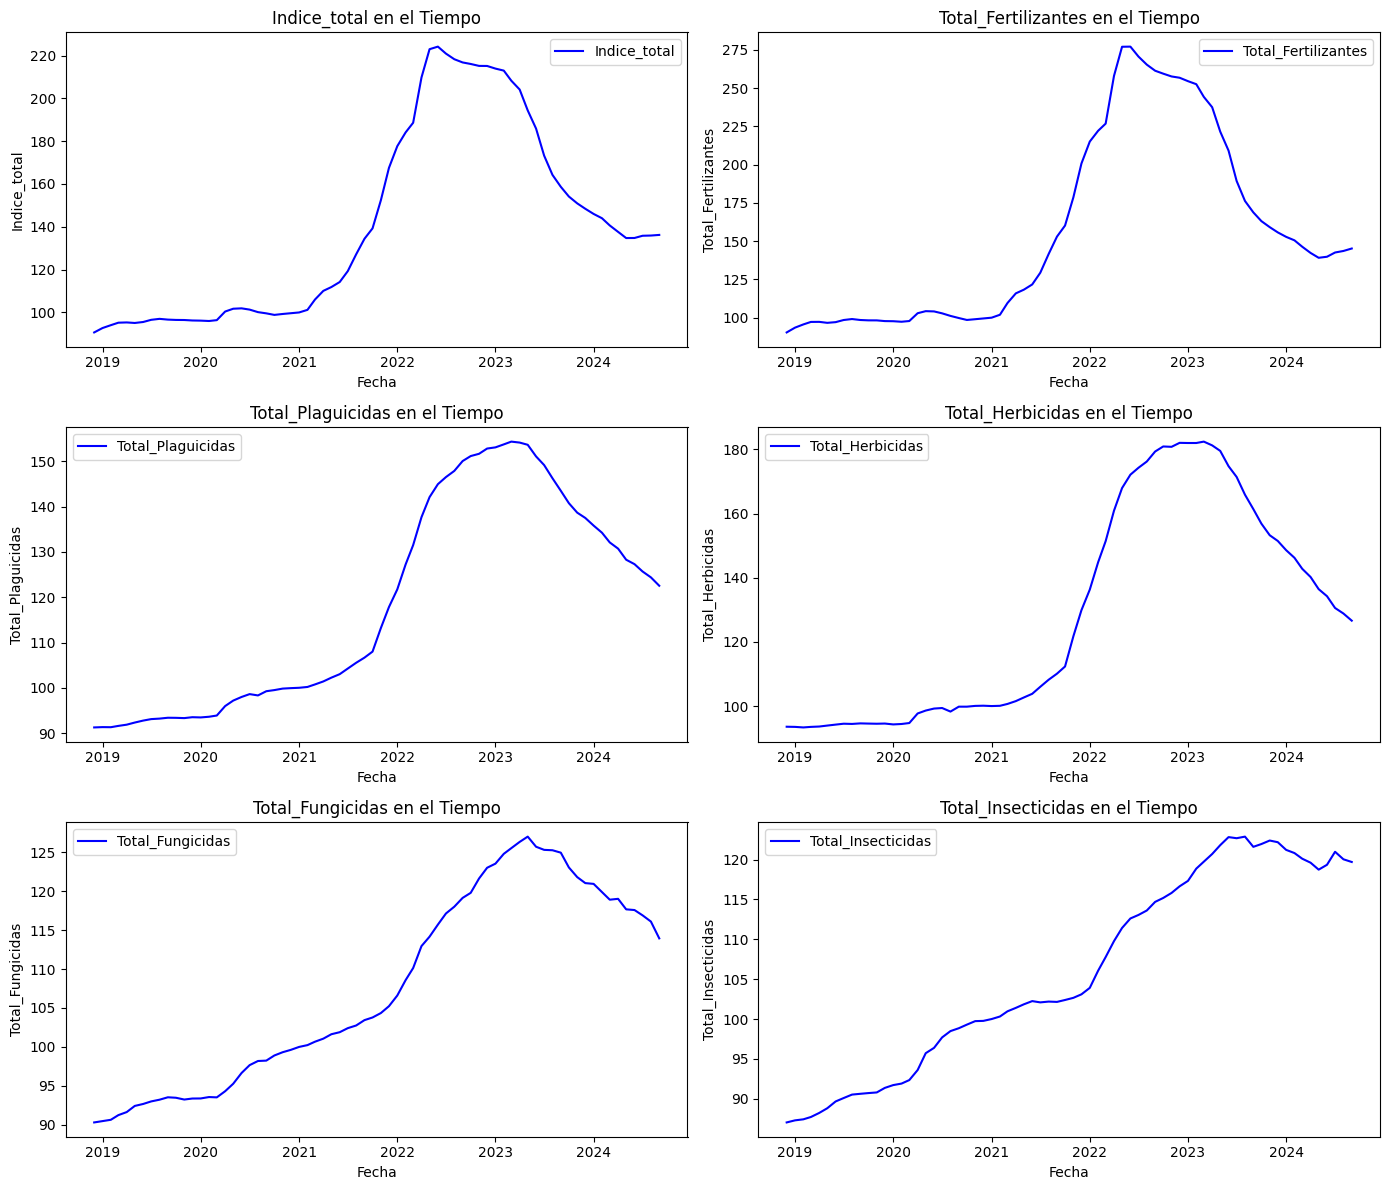

In [21]:
# Crear la figura y los ejes con una disposición de 2 columnas y 3 filas
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()  # Aplanar para iterar fácilmente

# Iterar sobre los conjuntos de datos y graficar cada columna en un gráfico separado
for i, (df_name, column) in enumerate(insumos.items()):
    df = globals()[df_name]  # Accede al DataFrame usando su nombre
    axes[i].plot(df.index, df[column], label=column, color='b')
    axes[i].set_title(f'{column} en el Tiempo')
    axes[i].set_xlabel('Fecha')
    axes[i].set_ylabel(column)
    axes[i].legend()

# Ajustar el diseño para evitar superposición de títulos y etiquetas
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

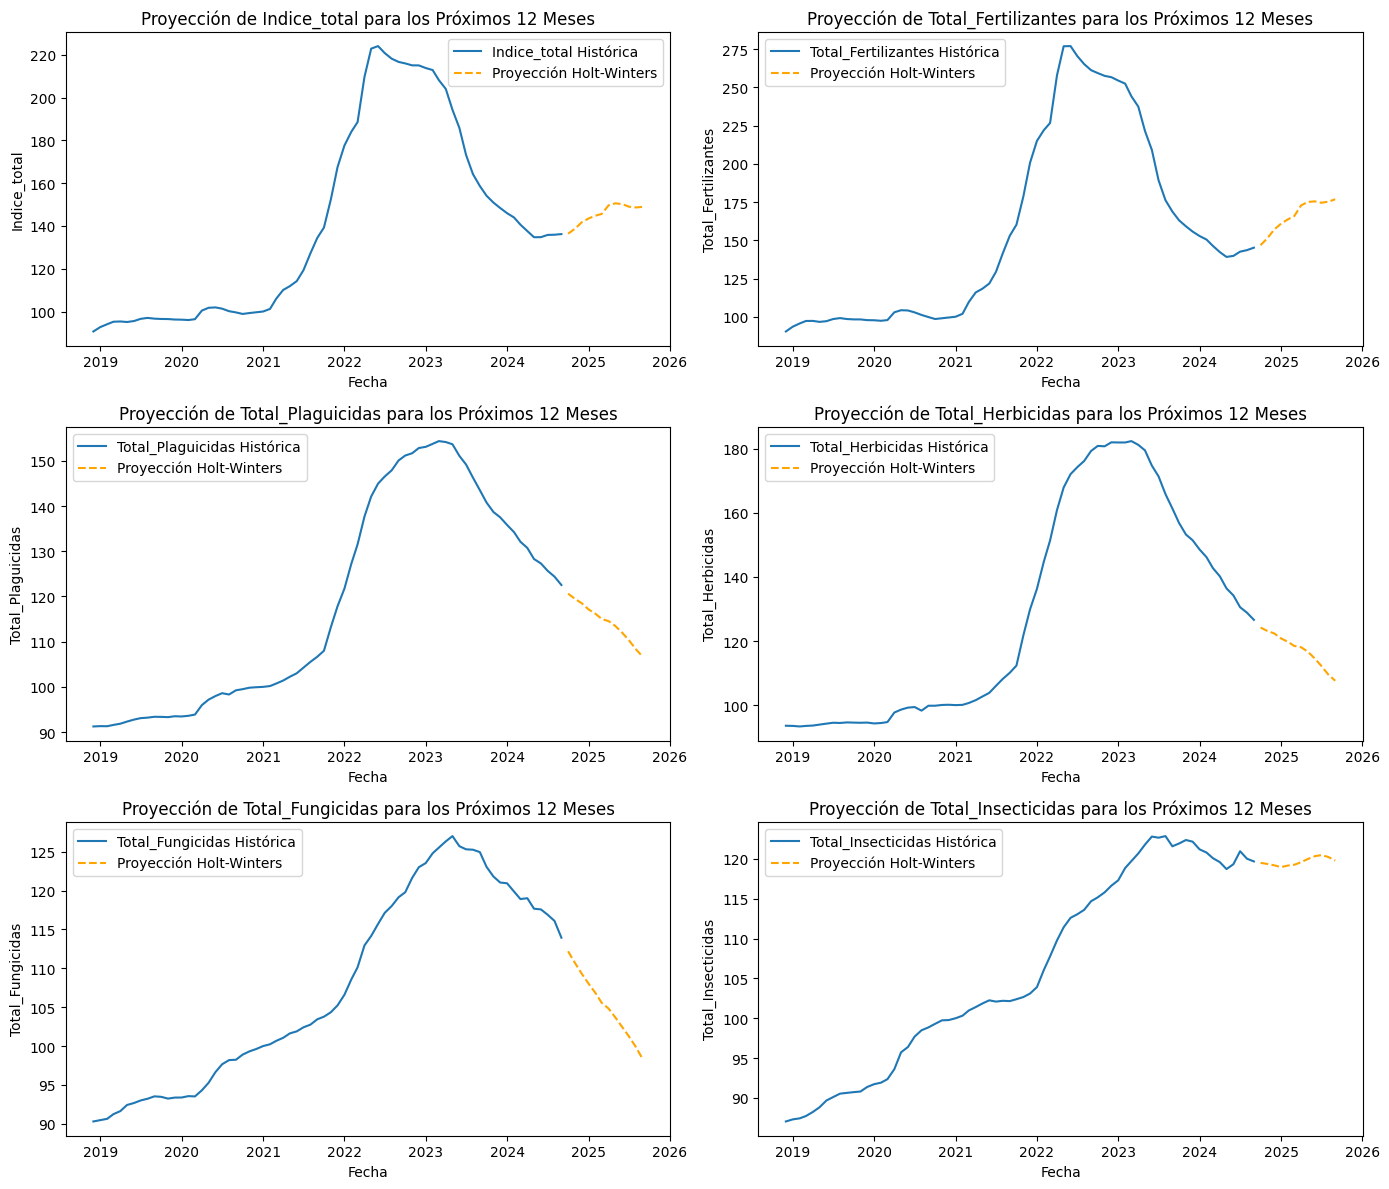

In [22]:
# Crear la figura y los ejes con una disposición de 2 columnas y 3 filas
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()  # Aplanar para iterar fácilmente

# Iterar sobre los conjuntos de datos y ajustar el modelo Holt-Winters a cada columna
for i, (df_name, column) in enumerate(insumos.items()):
    df = globals()[df_name]  # Accede al DataFrame usando su nombre

    # Ajustar el modelo Holt-Winters
    modelo_hw = ExponentialSmoothing(
        df[column],
        trend='add',
        seasonal='add',
        seasonal_periods=12
    ).fit()

    # Proyectar para los próximos 12 meses
    proyeccion_hw = modelo_hw.forecast(steps=12)

    # Graficar los datos históricos y la proyección
    axes[i].plot(df[column], label=f'{column} Histórica')
    axes[i].plot(proyeccion_hw, label='Proyección Holt-Winters', color='orange', linestyle='--')
    axes[i].set_title(f'Proyección de {column} para los Próximos 12 Meses')
    axes[i].set_xlabel('Fecha')
    axes[i].set_ylabel(column)
    axes[i].legend()

# Ajustar el diseño para evitar superposición de títulos y etiquetas
plt.tight_layout()
plt.show()
